In [2]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read movie data
movies_df = pd.read_csv("data/movies_dataset/movies_metadata.csv")
movies_df.head(5)

/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
# Displaying columns
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
# Display movie year wise
# First generate `year` column from `release_date` column 
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"], errors="coerce")
movies_df["year"] = movies_df["release_date"].dt.year
movies_df["year"].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

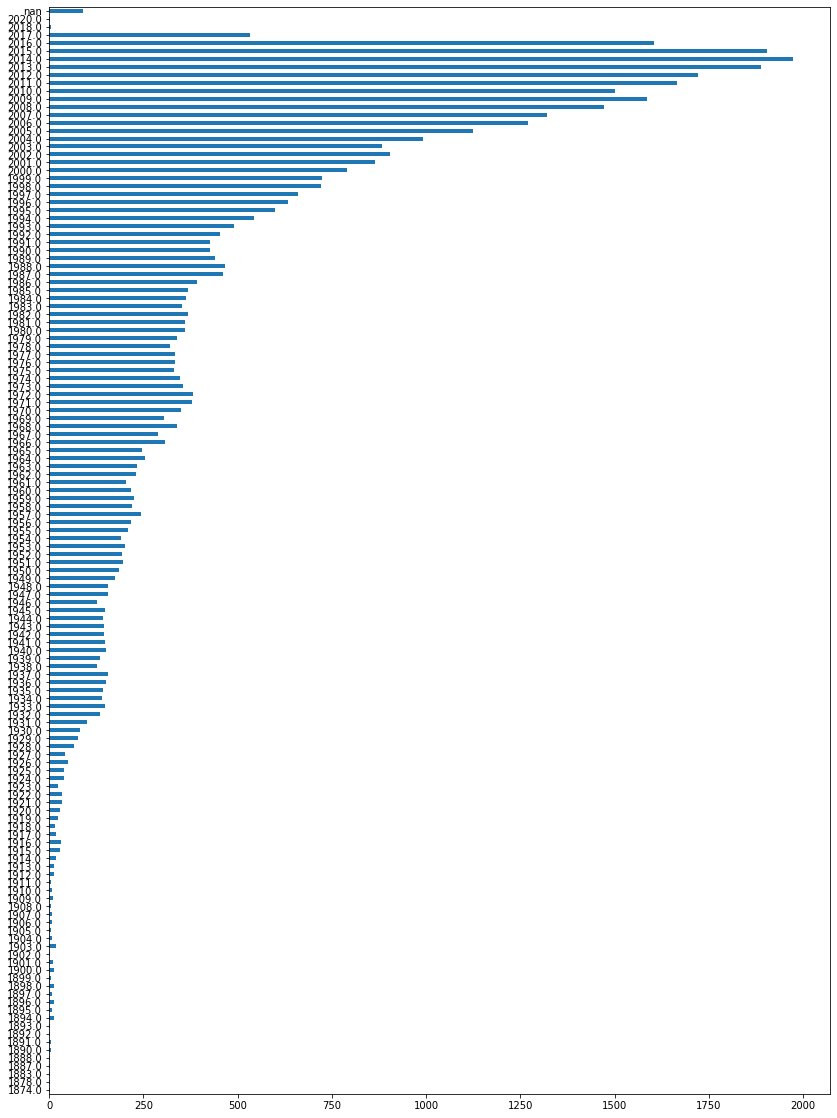

In [6]:
# View year wise movies in horizontal bar graph
movies_df.year.value_counts(dropna=False).sort_index().plot(kind="barh", figsize=(14,20))

In [7]:
# Consider movies till year 2016, as after that count of movies is low
print("Movies dataframe current shape: {}".format(movies_df.shape))
#     movies_df["year"].value_counts().sort_index()))
movies_df = movies_df[movies_df.year <= 2016.0]

Movies dataframe current shape: (45466, 25)


In [8]:
# Rename the column name `id`in moviesDF to `movieId` which will help in coming steps to join with ratings DF
movies_df.rename(columns = {'id':'movieId'}, inplace = True)
movies_df['movieId'] = movies_df['movieId'].astype(int)
mov = movies_df[['movieId']]
print("All movies containing duplicates too: ", mov.shape)
# Remove duplicates
mov.drop_duplicates(subset="movieId", keep="last", inplace=True)
print("All movies after removing duplicates: ", mov.shape)

All movies containing duplicates too:  (44838, 1)
All movies after removing duplicates:  (44808, 1)


/home/triloq/anaconda2/envs/mldl/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
# Read ratings data
ratings_df = pd.read_csv("data/movies_dataset/ratings.csv")

In [10]:
print("Shape of ratings DF: {}".format(ratings_df.shape))

Shape of ratings DF: (26024289, 4)


In [11]:
# As shape of ratings DF is very huge, it will take time in processing and can give error in pandas
# Hence just taking 1 million rows
ratings_df = ratings_df.head(1000000)

In [12]:
ratings_df

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
999995,10183,380,4.0,833459432
999996,10183,381,4.0,833460156
999997,10183,410,3.0,833459559
999998,10183,415,4.0,833460564


In [13]:
print("Unique users in ratings DF: ", ratings_df["userId"].nunique())
print("Unique movies which users have rated: ", ratings_df["movieId"].nunique())

Unique users in ratings DF:  10183
Unique movies which users have rated:  20291


In [14]:
# Grouping user Id and displaying count of movies rated
ratings_df.groupby("userId").agg("count").sort_values(by=["movieId"])

,movieId,rating,timestamp
userId,,,
4811,1,1,1
5375,1,1,1
5393,1,1,1
2674,1,1,1
7249,1,1,1
...,...,...,...
5829,2955,2955,2955
5620,3037,3037,3037
4916,3051,3051,3051


In [15]:
# Now let's merge movies and rating DF
movies_till_2016 = mov.merge(ratings_df, on="movieId", how="outer")
# movies_df.dtypes

In [16]:
# v = mov[mov.duplicated()]
# v
# movies_df[movies_df["movieId"]==105045]
# movies_till_2016[movies_till_2016['movieId']== 10991]
# k = movies_df[["movieId"]]
# k[k.duplicated()]

In [ ]:
movies_till_2016_piv = movies_till_2016.pivot(index='movieId', columns='userId', values='rating').fillna(0)